# Soil water-holding capacity

European soil database derived data - total available water content (TAWC)
for the topsoil [mm] (European Commission, n.d.; Hiederer, 2013a;
Hiederer, 2013b):
https://esdac.jrc.ec.europa.eu/content/european-soil-database-derived-data

In [1]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats

In [2]:
DATA_DIR = os.path.join("data", "soil", "european-soil-database-derived-data")

In [3]:
DATA_FILE = os.path.join(DATA_DIR, "IE_TAWC.tif")

In [4]:
data = rxr.open_rasterio(DATA_FILE, chunks="auto", masked=True)

In [5]:
data

<xarray.DataArray (band: 1, y: 409, x: 418)>
dask.array<open_rasterio-f60863f961dba41a45774b674cfc20e4<this-array>, shape=(1, 409, 418), dtype=float32, chunksize=(1, 409, 418), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.918e+06 2.92e+06 2.92e+06 ... 3.334e+06 3.336e+06
  * y            (y) float64 3.728e+06 3.728e+06 ... 3.322e+06 3.32e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    units:          milimeter
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
data.rio.crs

CRS.from_wkt('LOCAL_CS["Unknown",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [7]:
# ETRS 89 LAEA
data_crs = 3035

In [8]:
data.rio.write_crs(data_crs, inplace=True)

<xarray.DataArray (band: 1, y: 409, x: 418)>
dask.array<open_rasterio-f60863f961dba41a45774b674cfc20e4<this-array>, shape=(1, 409, 418), dtype=float32, chunksize=(1, 409, 418), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.918e+06 2.92e+06 2.92e+06 ... 3.334e+06 3.336e+06
  * y            (y) float64 3.728e+06 3.728e+06 ... 3.322e+06 3.32e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    units:          milimeter
    scale_factor:   1.0
    add_offset:     0.0

In [9]:
data.rio.crs

CRS.from_epsg(3035)

In [10]:
data.rio.resolution()

(1000.0, -1000.0)

In [11]:
# Ireland boundary
GPKG_BOUNDARY = os.path.join("data", "boundaries", "boundaries_all.gpkg")
ie = gpd.read_file(GPKG_BOUNDARY, layer="NUTS_RG_01M_2021_2157_IE")

In [12]:
ie.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [13]:
data.max().values

array(117.38613, dtype=float32)

In [14]:
data.min().values

array(0., dtype=float32)

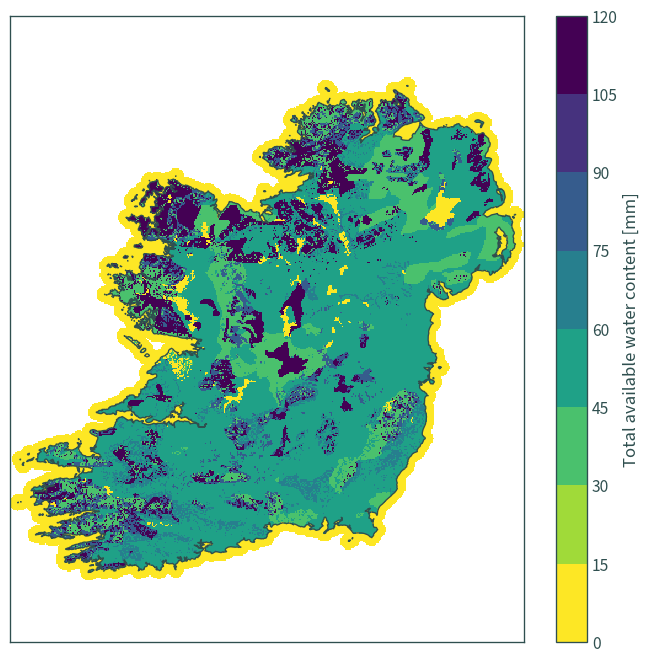

In [15]:
fig = data.plot(
    robust=True,
    cmap="viridis_r",
    figsize=(7, 7),
    levels=10,
    cbar_kwargs={"label": "Total available water content [mm]"},
)
ie.to_crs(data_crs).boundary.plot(
    ax=fig.axes, color="darkslategrey", linewidth=1
)
plt.title(None)
fig.axes.tick_params(labelbottom=False, labelleft=False)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.axis("equal")
plt.show()

## Grid cells

In [16]:
grid_cells = gpd.read_file(
    os.path.join("data", "ModVege", "params.gpkg"), layer="mera"
)

In [17]:
grid_cells.head()

,x,y,sr,ni,geometry
0,415000.0,497500.0,0.917024,0.35,"POLYGON ((415227.037 594343.036, 414771.907 59..."
1,417500.0,460000.0,0.763591,0.35,"POLYGON ((424513.435 557931.477, 424058.108 56..."
2,417500.0,462500.0,0.763591,0.35,"POLYGON ((424058.108 560389.011, 423602.795 56..."
3,417500.0,492500.0,0.917024,0.35,"POLYGON ((418595.321 589882.162, 418140.190 59..."
4,417500.0,495000.0,0.917024,0.35,"POLYGON ((418140.190 592340.144, 417685.076 59..."


In [18]:
grid_cells.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
grid_cells.shape

(14490, 5)

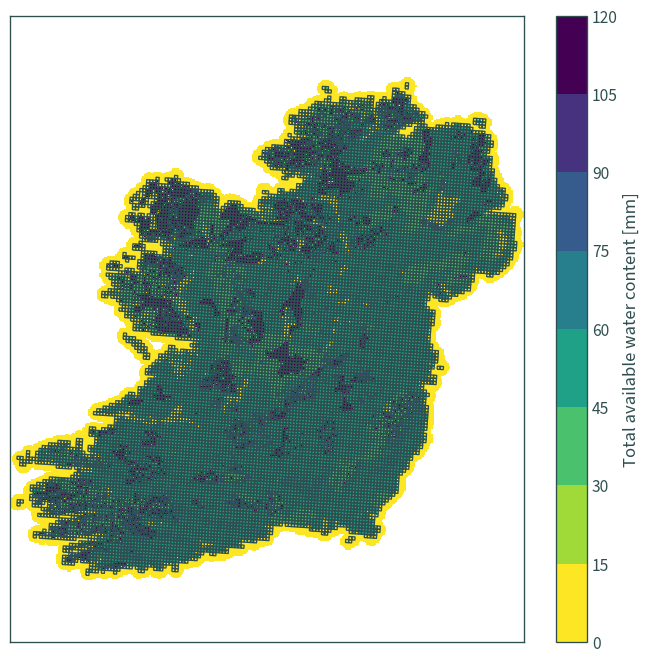

In [20]:
fig = data.plot(
    robust=True,
    cmap="viridis_r",
    figsize=(7, 7),
    levels=10,
    cbar_kwargs={"label": "Total available water content [mm]"},
)
grid_cells.to_crs(data_crs).boundary.plot(
    ax=fig.axes, color="darkslategrey", linewidth=1
)
plt.title(None)
fig.axes.tick_params(labelbottom=False, labelleft=False)
plt.xlabel(None)
plt.ylabel(None)
plt.tight_layout()
plt.axis("equal")
plt.show()

## Zonal stats

In [21]:
grid_cells = gpd.GeoDataFrame.from_features(
    zonal_stats(
        vectors=grid_cells.to_crs(data_crs),
        raster=os.path.join(DATA_DIR, "IE_TAWC.tif"),
        stats=["count", "mean"],
        geojson_out=True,
        nodata=-999999,
    ),
    crs=data_crs,
).to_crs(grid_cells.crs)

In [22]:
grid_cells.head()

,geometry,x,y,sr,ni,mean,count
0,"POLYGON ((415227.037 594343.036, 414771.907 59...",415000.0,497500.0,0.917024,0.35,0.000000,8
1,"POLYGON ((424513.435 557931.477, 424058.108 56...",417500.0,460000.0,0.763591,0.35,0.000000,6
2,"POLYGON ((424058.108 560389.011, 423602.795 56...",417500.0,462500.0,0.763591,0.35,0.000000,8
3,"POLYGON ((418595.321 589882.162, 418140.190 59...",417500.0,492500.0,0.917024,0.35,8.697089,9
4,"POLYGON ((418140.190 592340.144, 417685.076 59...",417500.0,495000.0,0.917024,0.35,0.000000,6


In [23]:
grid_cells.shape

(14490, 7)

In [24]:
grid_cells["mean"].min()

0.0

In [25]:
grid_cells["mean"].max()

117.38613552517361

In [26]:
grid_cells["count"].min()

4

In [27]:
grid_cells["count"].max()

9

In [28]:
grid_cells[grid_cells["count"] == 0]

,geometry,x,y,sr,ni,mean,count


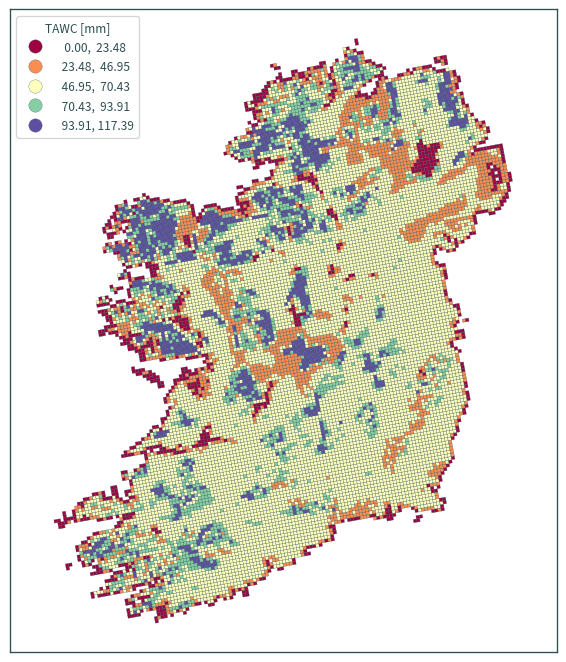

In [29]:
axs = grid_cells.plot(
    column="mean",
    cmap="Spectral",
    scheme="equal_interval",
    edgecolor="darkslategrey",
    linewidth=0.2,
    figsize=(6, 7),
    legend=True,
    legend_kwds={"loc": "upper left", "fmt": "{:.2f}", "title": "WHC [mm]"},
    missing_kwds={
        "color": "darkslategrey",
        "edgecolor": "darkslategrey",
        "label": "No data",
    },
)
for legend_handle in axs.get_legend().legend_handles:
    legend_handle.set_markeredgewidth(0.2)
    legend_handle.set_markeredgecolor("darkslategrey")
axs.tick_params(labelbottom=False, labelleft=False)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [30]:
grid_cells["whc"] = grid_cells["mean"]

In [31]:
grid_cells.drop(columns=["mean", "count"], inplace=True)

In [32]:
grid_cells.head()

,geometry,x,y,sr,ni,whc
0,"POLYGON ((415227.037 594343.036, 414771.907 59...",415000.0,497500.0,0.917024,0.35,0.000000
1,"POLYGON ((424513.435 557931.477, 424058.108 56...",417500.0,460000.0,0.763591,0.35,0.000000
2,"POLYGON ((424058.108 560389.011, 423602.795 56...",417500.0,462500.0,0.763591,0.35,0.000000
3,"POLYGON ((418595.321 589882.162, 418140.190 59...",417500.0,492500.0,0.917024,0.35,8.697089
4,"POLYGON ((418140.190 592340.144, 417685.076 59...",417500.0,495000.0,0.917024,0.35,0.000000


In [33]:
grid_cells.to_file(
    os.path.join("data", "ModVege", "params.gpkg"), layer="mera"
)